In [ ]:
# python3 -m spacy download en

In [1]:
import torch
import torchtext
from torchtext import datasets

import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import spacy

In [5]:
tweets = pd.read_csv('../data/Sentiment Analysis Dataset.csv', error_bad_lines=False)

/tmp/ipykernel_2955130/3138329574.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv('../data/Sentiment Analysis Dataset.csv', error_bad_lines=False)
b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [6]:
tweets = tweets.head(50000)
tweets.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [7]:
tweets.Sentiment.value_counts()

1    26921
0    23079
Name: Sentiment, dtype: int64

[Text(0.5, 0, 'Labels')]

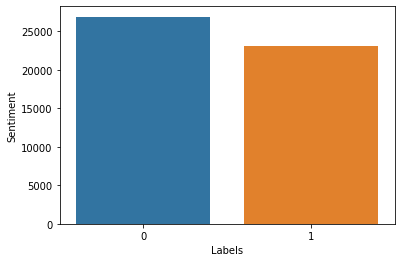

In [11]:
ax = sns.barplot(x=tweets.Sentiment.unique(), y=tweets.Sentiment.value_counts())
ax.set(xlabel="Labels")

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tweets, test_size=0.2, random_state=42)

In [13]:
train.reset_index(drop=True), test.reset_index(drop=True)

(       ItemID  Sentiment SentimentSource  \
 0       39100          1    Sentiment140   
 1       30906          0    Sentiment140   
 2       45291          0    Sentiment140   
 3       16411          0    Sentiment140   
 4       13666          0    Sentiment140   
 ...       ...        ...             ...   
 39995   11297          1    Sentiment140   
 39996   44745          1    Sentiment140   
 39997   38171          1    Sentiment140   
 39998     861          0    Sentiment140   
 39999   15808          1    Sentiment140   
 
                                            SentimentText  
 0      @amyrenea omg so am I lol I fell asleep when i...  
 1                   @Adrienne_Bailon I want a shout out   
 2      @Anonymousboy03 Plans for school stuff &amp; a...  
 3      ... has hit a writer's block .. am loosing my ...  
 4      ... trying to find people I know! I`m bored, i...  
 ...                                                  ...  
 39995   #robotpickuplines are so funn

In [15]:
train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

In [18]:
def tween_cleen(text):
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    text = re.sub(r'https?:/\/\S+', ' ', text)
    return text.strip()

In [21]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner'])

In [22]:
def tokenizer(s):
    return [w.text.lower() for w in nlp(tween_cleen(s))]

In [ ]:
# https://colab.research.google.com/github/pytorch/text/blob/master/examples/legacy_tutorial/migration_tutorial.ipynb

In [24]:
from collections import Counter
from torchtext.vocab import Vocab

In [3]:
from torchtext.datasets import IMDB

In [4]:
train_iter, test_iter = IMDB(split=('train', 'test'))

/home/eyalshw/git/courses/venv/lib/python3.8/site-packages/torch/utils/data/datapipes/utils/common.py:24: UserWarning: Lambda function is not supported for pickle, please use regular python function or functools.partial instead.
  warnings.warn(
/home/eyalshw/git/courses/venv/lib/python3.8/site-packages/torch/utils/data/datapipes/iter/selecting.py:54: UserWarning: Lambda function is not supported for pickle, please use regular python function or functools.partial instead.
  warnings.warn("Lambda function is not supported for pickle, please use "


In [6]:
type(train_iter)

torch.utils.data.datapipes.iter.callable.MapperIterDataPipe

In [7]:
from torchtext.data import Field

ImportError: cannot import name 'Field' from 'torchtext.data' (/home/eyalshw/git/courses/venv/lib/python3.8/site-packages/torchtext/data/__init__.py)

In [ ]:
from torchtext import data
